# Histogram Equalization

implement some contrast enhancement techniques from the async lectures.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
!ls

Data                        contrast_equalization.ipynb
LICENSE                     requirements.txt
README.md                   setup_notebook.sh
canny_filter_harry.ipynb    venv
chest-ctscan-images.zip


In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import urllib
from PIL import Image

from skimage import exposure, data, img_as_float
from skimage.color import rgb2gray

matplotlib.rcParams['font.size'] = 16


def plot_img_and_hist(image, axes, title, bins=256):
    """ 
    Plot an image along with its histogram and cumulative histogram
    """

    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=1)
    ax_img.set_axis_off()
    ax_img.set_title(title)

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_cdf
    

def display_images(orig, stretched, gamma, hist_eq):
  """
  Plot the original image and all three modified images
  along with their histograms
  """

  fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

  # plot original
  plot_img_and_hist(orig, axes[:, 0], title='Original Image')

  # set left y-axis label
  y_min, y_max = axes[1, 0].get_ylim()
  axes[1, 0].set_ylabel('Number of pixels')
  axes[1, 0].set_yticks(np.linspace(0, y_max, 5))

  # plot modifications
  plot_img_and_hist(stretched, axes[:, 1], title='Contrast Stretching')
  plot_img_and_hist(gamma, axes[:, 2], title='Gamma Correction')
  ax_cdf = plot_img_and_hist(hist_eq, axes[:, 3], title='Histogram Equalization')

  # set right y-axis label
  ax_cdf.set_ylabel('Fraction of total intensity')
  ax_cdf.set_yticks(np.linspace(0, 1, 5))

  # prevent overlap of y-axis labels
  fig.tight_layout()
  plt.show()

def read_img(url):
  return np.array(Image.open(urllib.request.urlopen(url)))[:, :, :3]

In [16]:
# contrast stretching
def contrast_stretching(in_img):
  # get min and max
  min_v = np.min(in_img)
  max_v = np.max(in_img)

  # rescale intensity to min/max range
  out_img = exposure.rescale_intensity(in_img, in_range=(min_v, max_v))
  return out_img

# gamma correction
def gamma_correction(in_img, gamma):
  # convert img to float64
  f_img = in_img.astype(np.float64)/255.0

  # apply gamma
  g_img = f_img ** gamma

  # convert img back to uint8
  out_img = (g_img * 255).astype(np.uint8)
  return out_img

# histogram equalization
def histogram_equalization(in_img):
  # compute cdf
  img_cdf, bins = exposure.cumulative_distribution(in_img, 256)
  
  # create empty array for all possible pixel values
  new_cdf = np.zeros(256)

  # populate array with values from cdf
  # use bins as the index into the array
  new_cdf[bins] = img_cdf

  # create empty array the same size as the image
  out_img = np.zeros(in_img.shape, dtype=in_img.dtype)

  # for each pixel, look up the value from the cdf
  for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
      out_img[i, j] = (new_cdf[ in_img[i, j] ] * 255)

  return out_img

img_n.shape is  (481, 617, 4)
img_a.shape is  (221, 368, 4)
img_l.shape is  (213, 423, 4)
img_l.shape is  (213, 423, 4)


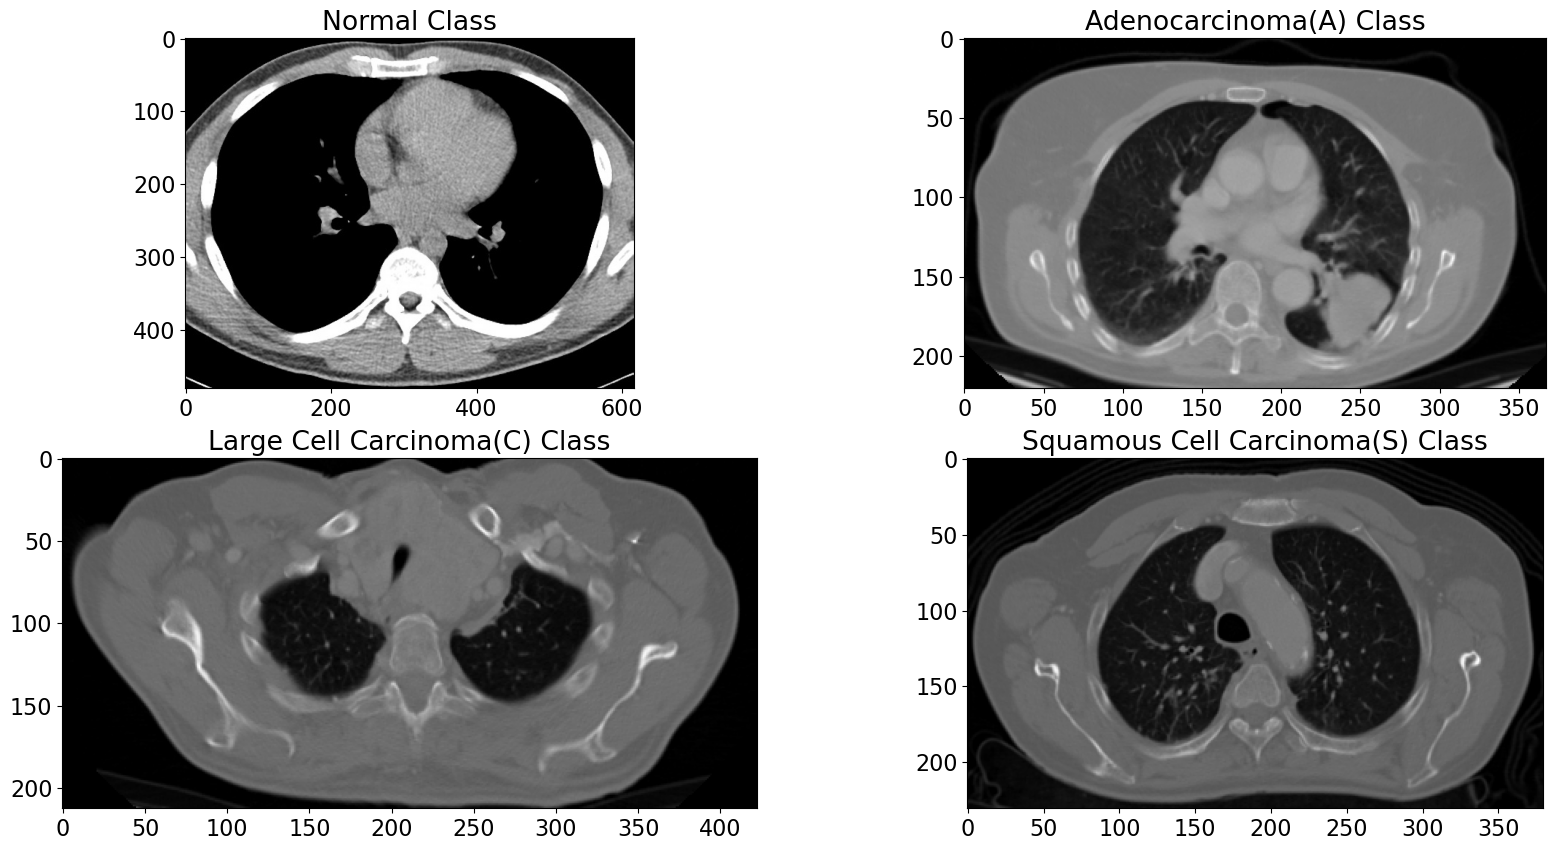

In [17]:
n_path = 'Data/train/normal/4.png'
a_path = 'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000061.png'
l_path = 'Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000002.png'
s_path = 'Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000003.png'

img_n = plt.imread(n_path)
print('img_n.shape is ',img_n.shape)
img_a = plt.imread(a_path)
print('img_a.shape is ',img_a.shape)
img_l = plt.imread(l_path)
print('img_l.shape is ',img_l.shape)
img_s = plt.imread(s_path)
print('img_l.shape is ',img_l.shape)

# visualize the points
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax[0,0].imshow(img_n,cmap='gray', vmin=0, vmax=255)
ax[0,0].title.set_text('Normal Class')
ax[0,1].imshow(img_a, cmap='gray', vmin=0, vmax=255)
ax[0,1].title.set_text('Adenocarcinoma(A) Class')
ax[1,0].imshow(img_l, cmap='gray', vmin=0, vmax=255)
ax[1,0].title.set_text('Large Cell Carcinoma(C) Class')
ax[1,1].imshow(img_s, cmap='gray', vmin=0, vmax=255)
ax[1,1].title.set_text('Squamous Cell Carcinoma(S) Class')


plt.show()

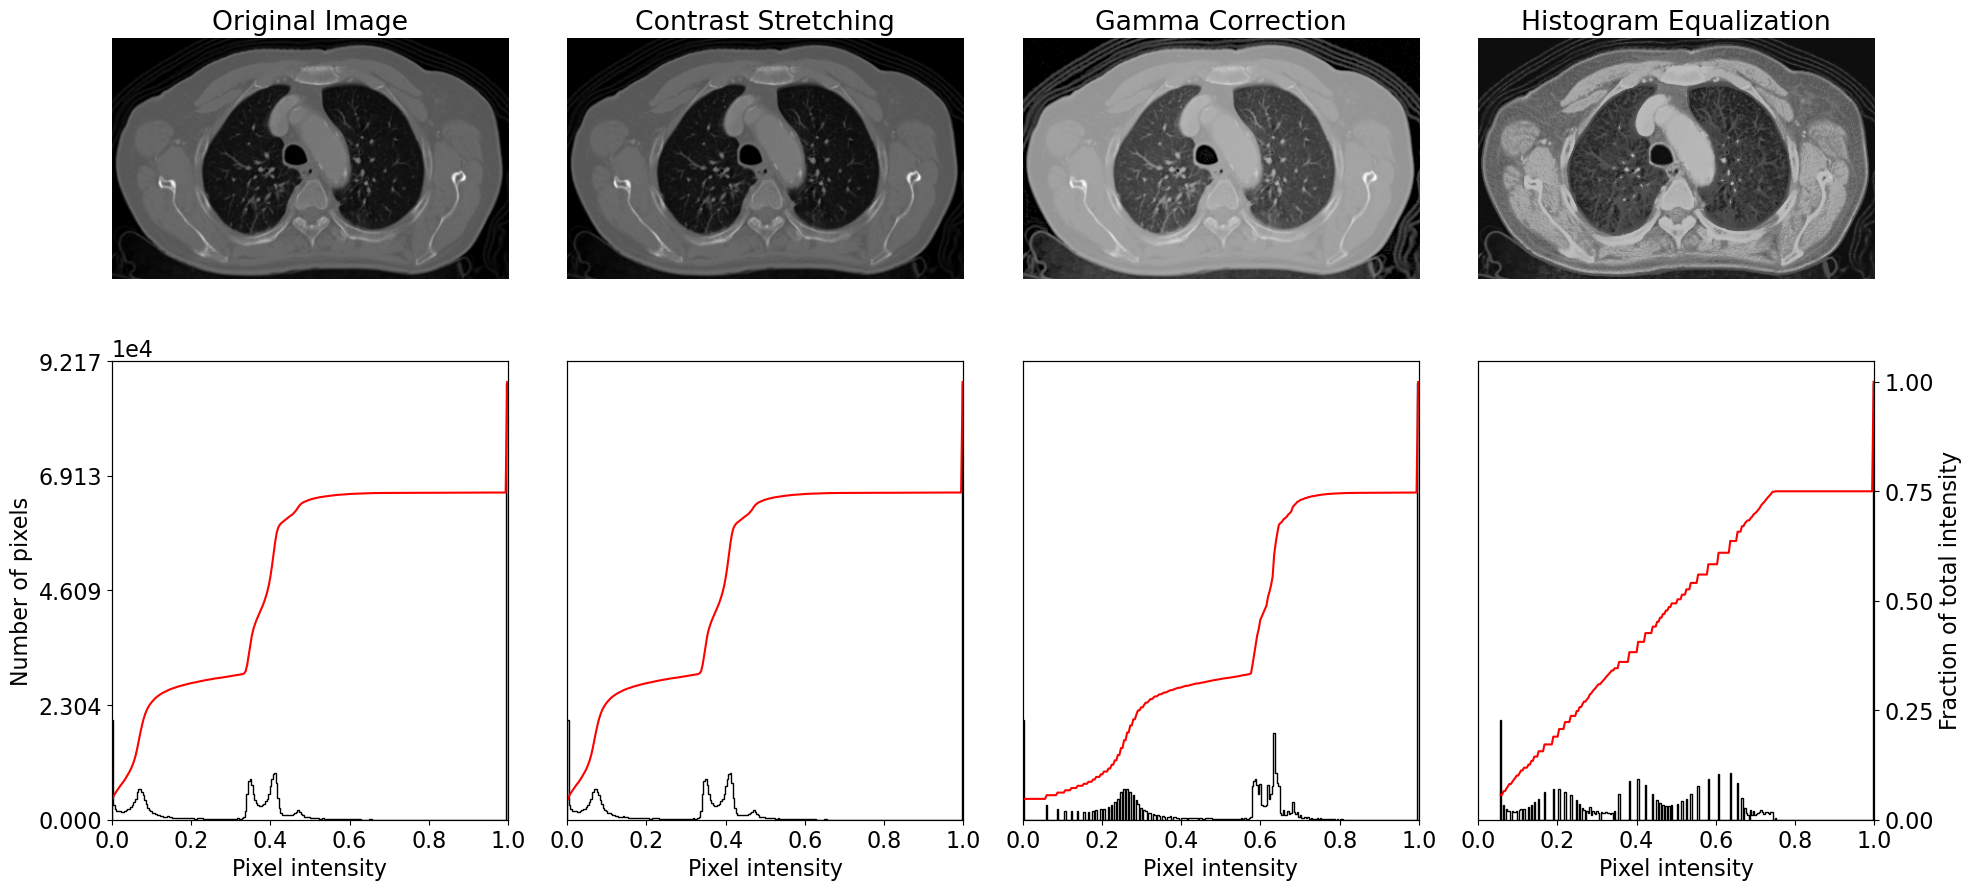

In [27]:
# pre-process image
img_s = (img_s * 255).astype(np.uint8)
display_images(img_s, contrast_stretching(img_s), gamma_correction(img_s, gamma=0.5), histogram_equalization(img_s))

